<h1 style="color:red">Machine Learning : Linear Regression VS One Neuron</h1>

<p>Les bibliothèques suivantes sont à utiliser</p>

In [1100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #split data ino training data and test data 
import pandas as pnd

<h1 style="color:DodgerBlue;">I. Partie 1: Linear Regression</h1>

<img src="model.png"  width="600" height="450"/>

<p>Un modèle de régression permet de faire la liaison entre la sortie et l'entrée de la manière suivante:</p>
<p>y=H(X). avec y est l'output et X est linput. En général X est une matrice (tableau à deux dimension avec plusieurs colonnes (variables) x1,x2...xn).</p>
<p>le modèle H à trouver a la forme suivante: H(X)=bias+w1.x1+w2.x2+...+wn.xn</p>
<p>dans un premier temps, pour simplifier, nous allons considérer un X avec une seule variable. dans ce cas, notre modèle a la forme suivante:</p>
<p>H(x1)=bias+w1.x1</p>
<p>qu'est ce que c'est l'apprentissage?</p>
<p>L'apprentissage est la capacité d'un algorithme de trouver les bons paramètres du modèle qui sont: bias et wi pour i allant de 1 à n, avec n le nombre de variables à l'input.</p>
<p>pour le cas d'une seule dimension, l'algorithme est cencé de trouver le bias et le bon w1</p>

<h2 style="color:DodgerBlue;">I.1. Linear Regression Model: example</h2>

<h3 style="color:Tomato;">I.1.1. Data</h3>

<h4 style="color:Tomato;">Step 1: Load / Initialize Data</h4>

In [1101]:
X=np.array([1,2,3,4,7]) #features
y=np.array([4,7,10,13,22]) #target

<h4 style="color:Tomato;">Step 2: Plot Data</h4>

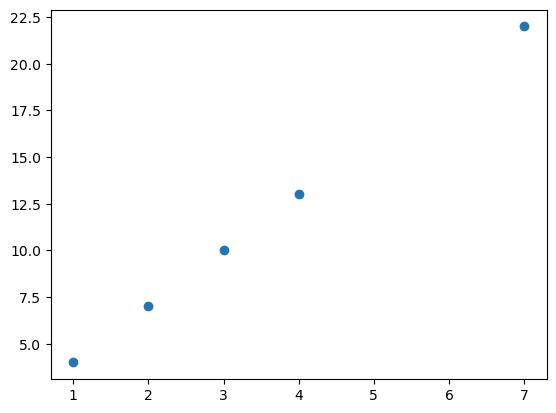

In [1102]:
plt.scatter(X,y)

<h4 style="color:Tomato;">Step 3: Split Data</h4>

<p>pour évaluer la performance du modèle, il est nécessaire de tester le modèle ( calculer mse) sur des données non utilisées dans la phase d'apprentissage</p>
<p>Mais, pour cet exemple, le data set est de taille très petite, alors nous allons pas le diviser (split) en training set et et test set.</p> 

<h3 style="color:Tomato;">I.1.2. Model (version 1 - without gradient descent)</h3>

<h4 style="color:Tomato;">Step 1: Model Training</h4>

<p>le programme suivant permet de calculer l'erreur pour plusieurs couple (bias,w1). chaque couple (bias,w1) représente un modèle</p>
<p>pour simplifier, nous allons fixer bias</p> 

In [1103]:
def train1(X,y):
    #hyper parameters initailization
    epochs=60
    learning_rate=0.1 #
    #parameters initialization
    w1=0 #noter que cette valeur se trouve à gauche de l'optimum recherché (w1=3)
    bias=1 #pour simplifier, le bias est considéré trouvé: à ne pas mettre à jour
    
    global mseList
    mseList=[] #means squared error list pour chaque valeur de w1
    global w1List
    w1List=[] #les valeurs prises par w1 sont enregistrées dans w1List 
    n=len(X)
    for i in range(epochs):
        yhat=bias+w1*X
        error=y-yhat # error
        squared_error=error**2 #squared error 
        mse=(1/n)*sum(squared_error) #mean squared error
        print("iteration ",i,": (bias=",round(bias,2),",w1:",round(w1,2),") --->mse=",round(mse,2))
       
        mseList.append(mse)
        w1List.append(w1)
        
        dw1=0.1
        w1=w1+dw1
        
    return bias,w1
        
bias,w1=train1(X,y)
    

iteration  0 : (bias= 1 ,w1: 0 ) --->mse= 142.2
iteration  1 : (bias= 1 ,w1: 0.1 ) --->mse= 132.88
iteration  2 : (bias= 1 ,w1: 0.2 ) --->mse= 123.87
iteration  3 : (bias= 1 ,w1: 0.3 ) --->mse= 115.18
iteration  4 : (bias= 1 ,w1: 0.4 ) --->mse= 106.81
iteration  5 : (bias= 1 ,w1: 0.5 ) --->mse= 98.75
iteration  6 : (bias= 1 ,w1: 0.6 ) --->mse= 91.01
iteration  7 : (bias= 1 ,w1: 0.7 ) --->mse= 83.58
iteration  8 : (bias= 1 ,w1: 0.8 ) --->mse= 76.47
iteration  9 : (bias= 1 ,w1: 0.9 ) --->mse= 69.68
iteration  10 : (bias= 1 ,w1: 1.0 ) --->mse= 63.2
iteration  11 : (bias= 1 ,w1: 1.1 ) --->mse= 57.04
iteration  12 : (bias= 1 ,w1: 1.2 ) --->mse= 51.19
iteration  13 : (bias= 1 ,w1: 1.3 ) --->mse= 45.66
iteration  14 : (bias= 1 ,w1: 1.4 ) --->mse= 40.45
iteration  15 : (bias= 1 ,w1: 1.5 ) --->mse= 35.55
iteration  16 : (bias= 1 ,w1: 1.6 ) --->mse= 30.97
iteration  17 : (bias= 1 ,w1: 1.7 ) --->mse= 26.7
iteration  18 : (bias= 1 ,w1: 1.8 ) --->mse= 22.75
iteration  19 : (bias= 1 ,w1: 1.9 ) --->m

<h3 style="color:Tomato;">Analyse du code et interprétation du résultat</h3>
<h3 style="color:DodgerBlue;">Graphe 1: Evolutionde mse en fonction de w1 et en fonction des itérations</h3>



In [1104]:
#cette fonction est utilisé dans tout le tutorial
def tracer_graphes(w1List,mseList,iterations):
    plt.figure(figsize=(10,3))
    plt.subplot(121) #
    plt.plot(w1List,mseList)
    plt.xlabel("w1")
    plt.ylabel("mse")
    plt.title("mse en fonction de w1")
    plt.subplot(122)
    plt.plot(iterations,mseList)

    plt.xlabel("iteration")
    plt.ylabel("mse")
    plt.title("mse en fonction des iterations")


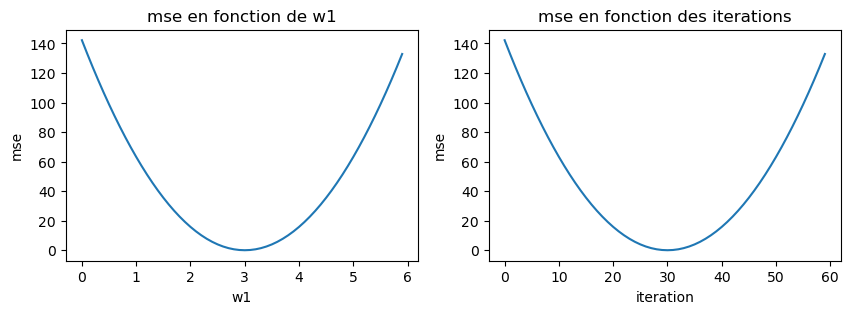

In [1105]:
tracer_graphes(w1List,mseList,[i for i in range(60)])

<h4 style="color:Tomato;">Step 2: Model Prediction</h4>

In [1106]:
def predict(x1):
    return bias+w1*x1

In [1107]:
yhat=predict(X)

<h4 style="color:Tomato;">Step 3: Model Evaluation</h4>
vu que le dataset est tres petit, nous allons utiliser le dataset de training (X) pour évaluer le modèle (bad practice)
<br>dans l'exemple suivant, nous allons utiliser un dataset de test pour évaluer le modèle

In [1108]:
def mse(y,yhat):
    return 1/(len(y))*np.sum((y-yhat)**2)

In [1109]:
print("mean squared error du modèle est:",round(mse(y,yhat),3))

mean squared error du modèle est: 142.2


In [1110]:
bias,round(w1,2)

(1, 6.0)

<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse à partir de l'itération 0 à l'iération 30?</span>
</p>
<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse à partir de l'itération 30 à l'iération 59?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">à quelle itération, mse est minimal?</span>
</p>


<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">comment se comporte l'algorithme si on initialise w1 à 6?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 5) </b></span>
    <span  style="color:DodgerBlue;">comment se comporte l'algorithme si dw1=2? (ou autre valeur plus grande que 2)</span>
</p>

<p>
    <span style="color:Tomato;"><b> 6) </b></span>
    <span  style="color:DodgerBlue;">comment la dérivée partielle (dmse/dw1) permet de régler le problème en 4)? (Algorithme du gradient)</span>
</p>

<p>
    <span style="color:Tomato;"><b> 7) </b></span>
    <span  style="color:DodgerBlue;">comment le learning rate permet de régler le problème en 5)?</span>
</p>

<p>
    <span style="color:Tomato;"><b> 8) </b></span>
    <span  style="color:DodgerBlue;">justifier la valeur de mse  trouvé?</span>
</p>



<h3 style="color:Tomato;">REPONSES</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse à partir de l'itération 0 à l'iération 30?</span>
</p>
<p>
    <span style="color:Tomato;"><b> Réponse </b></span>
    <span  style="color:black;"><br>comme montré dans le graphe et à partir des valeurs imprimées pendant l'apprentissage,<br>à l'iération 0, mse=142.2 <br>
    à l'itération 1, mse=132.88<br>
        ensuite, mse continue à dminuer jusqu'à litération 30.<br>
    à l'itération 30, mse=0
    </span>
</p>

<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse à partir de l'itération 30 à l'iération 59?</span>
</p>
<p>
    <span style="color:Tomato;"><b> Réponse </b></span>
    <span  style="color:black;">
        <br>comme montré dans le graphe et à partir des valeurs imprimées pendant l'apprentissage<br>
        à l'iération 30, mse=0 <br>
    à l'itération 31, mse=0.16<br>
        ensuite, mse continue à augmenter jusqu'à litération 59.<br>
    à l'itération 59, mse=132.88
    </span>
</p>


<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">à quelle itération, mse est minimal?</span>
</p>

<p>
    <span style="color:Tomato;"><b> Réponse </b></span>
    <span  style="color:black;"><br>comme montré dans le graphe et à partir des valeurs imprimées pendant l'apprentissage,<br>la valeur de mse est minimal (mse=0) à l'itération 30, et pour w1=3 <br>
      </span>
</p>


<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">comment se comporte l'algorithme si on initialise w1 à 6?</span>
</p>

<p>
    <span style="color:Tomato;"><b> Réponse </b></span>
    <span  style="color:black;"><br>pour w1 initialisé à 6, <br>
        si on analyse le programme, et exatement les deux instructions suivantes:<br>
        dw1=0.1
        w1=w1+dw1 #augmentation de w1
        <br>
        la valeur de w1 va contnier à augmenter (s'éloigne de l'optimum w1=3) <br>
        ce qui implique l'augmentation de mse (d'après les graphes)
      </span>
</p>


<p>
    <span style="color:Tomato;"><b> 5) </b></span>
    <span  style="color:DodgerBlue;">comment se comporte l'algorithme si dw1=2? (ou autre valeur plus grande que 2)</span>
</p>

<p>
    <span style="color:Tomato;"><b> Réponse </b></span>
    <span  style="color:black;"><br>pour dw1=2, et pour w1 initail (w1=0) <br>
        à chaque itération, on ajoute à w1 la valeur 2: w1=0,2,4,6,8...
        <br>
        ce qui montre que notre algorithme saute le minimum: le pas de mise à jour est grand<br>
        
      </span>
</p>

<p>
    <span style="color:Tomato;"><b> 6) </b></span>
    <span  style="color:DodgerBlue;">comment la dérivée partielle (dmse/dw1) permet de régler le problème en 4)? (Algorithme du gradient)</span>
</p>
<p>
    <span style="color:Tomato;"><b> Réponse </b></span>
    <span  style="color:black;"><br>la dérivé partielle aide à trouver l'oientation de mise à jour: signe de la dérivée partielle<br>
        si le signe est négative (w1 courant à gauche du w1 optimal (3)): mse diminue, donc aller vers la droite. w1=w1-dw1
  <br> et puisque dw1 est négative, w1 va augmenter (ce qu'on cherche à faire)
  <br>si le signe est positif (w1 courant à droite du w1 optimal (3)): mse augmente, donc aller vers la gauche. w1=w1-dw1
   <br> et puisque dw1 est positif, w1 va diminuer (ce qu'on cherche à faire)
  </span>
</p>


<p>
    <span style="color:Tomato;"><b> 7) </b></span>
    <span  style="color:DodgerBlue;">comment le learning rate permet de régler le problème en 5)?</span>
</p>


<p>
    <span style="color:Tomato;"><b> Réponse </b></span>
    <span  style="color:black;">
        <br>le learning rate est une constante qui permet d'assurer des petits pas d'apprentissage pour éviter de sauter l'optimum
        <br>cette valeur est à multiplier par dw1.
        <br>sa valeur est toujours entre 0 et 1. en général, on met: learning_rate=0,1,0.01,0.001, ...selon les cas
        <br> cette valeur affaiblit la quantité de mise à jour à appliquer sur w1.
      </span>
</p>


<p>
    <span style="color:Tomato;"><b> 8) </b></span>
    <span  style="color:DodgerBlue;">justifier la valeur de mse  trouvé?</span>
</p>

<p>
    <span style="color:Tomato;"><b> Réponse </b></span>
    <span  style="color:black;">
        <br>mse affiché du modèle (bias,w1) est : 142.2
        <br>cette valeur est grande à cause du modèle calculé par le program (bias=1,w1=6)
        <br>un modèle loin de ce qu'on attend (bias=1,w1=3)
    </span>
</p>


<h3 style="color:Tomato;">I.1.3. Model (version 2- using gradient descent)</h3>

<h4 style="color:Tomato;">Step 1: Model Trainig</h4>

iteration  0 : (bias= 0 ,w1: 0 ) --->mse= 163.6  | update: dbias= -22.4 , dw1= -101.6
iteration  1 : (bias= 0.22 ,w1: 1.02 ) --->mse= 73.26419  | update: dbias= -15.04 , dw1= -67.97
iteration  2 : (bias= 0.37 ,w1: 1.7 ) --->mse= 32.81804  | update: dbias= -10.12 , dw1= -45.47
iteration  3 : (bias= 0.48 ,w1: 2.15 ) --->mse= 14.70895  | update: dbias= -6.83 , dw1= -30.41
iteration  4 : (bias= 0.54 ,w1: 2.45 ) --->mse= 6.60082  | update: dbias= -4.62 , dw1= -20.34
iteration  5 : (bias= 0.59 ,w1: 2.66 ) --->mse= 2.97042  | update: dbias= -3.15 , dw1= -13.6
iteration  6 : (bias= 0.62 ,w1: 2.79 ) --->mse= 1.34483  | update: dbias= -2.16 , dw1= -9.09
iteration  7 : (bias= 0.64 ,w1: 2.88 ) --->mse= 0.61685  | update: dbias= -1.5 , dw1= -6.07
iteration  8 : (bias= 0.66 ,w1: 2.95 ) --->mse= 0.29076  | update: dbias= -1.05 , dw1= -4.05
iteration  9 : (bias= 0.67 ,w1: 2.99 ) --->mse= 0.14462  | update: dbias= -0.76 , dw1= -2.7
iteration  10 : (bias= 0.68 ,w1: 3.01 ) --->mse= 0.07903  | update: dbi

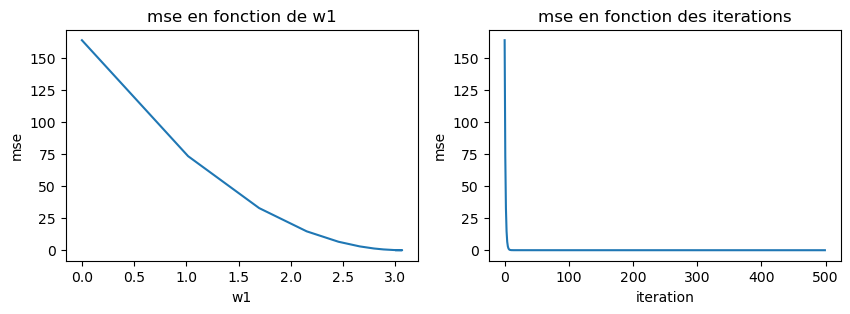

In [1111]:
def train2(X,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.01
    epochs=500
    #model parameters initialisation
    w1=0 #w1 attendu c'est 3
    bias=0 # attendu 1
    #----------------------
    n=len(X) #data size
    global w1List
    w1List=[] #list of w1: each iteration, we have a w1 value.
    global mseList
    mseList=[] # list of means squared errors: each iteration, we have a mse  

    #training
    for i in range(epochs):
          #error calculation
        yhat=bias+w1*X #prediction
        error=y-yhat # Error
        squared_error=error**2 #squared error
        mse=(1/n)*sum(squared_error) #mean squared error
        #print("(",bias, ",", w1, ") ----->",mse)
        mseList.append(mse)
        w1List.append(w1)
        dw1=(-2/n)*np.sum(X*(y-yhat)) # partial derivate of mse / w1////0.1
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / w1
        
        print("iteration ",i,": (bias=",round(bias,2),",w1:",round(w1,2),") --->mse=",round(mse,5)," | update: dbias=",round(dbias,2),", dw1=",round(dw1,2))
    
        w1=w1-dw1*learning_rate # orientation (-) + pas d'apprentissage (l)
        bias=bias-dbias*learning_rate
        
        
    return bias,w1
        

#execution
bias,w1=train2(X,y)
tracer_graphes(w1List,mseList,[i for i in range(500)])

In [1112]:
yhat=predict(X)
print("mean squared error du modèle est:",round(mse(y,yhat),5))

mean squared error du modèle est: 0.00017


<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse dans les 6 premières itérations? comment justifier ce résultat</span>
</p>
<p>
    <span style="color:Tomato;"><b> réponse </b></span>
    <span  style="color:black;">des les 6 premières itérations, mse diminue. <br>à l'itération 0, mse vaut 163.6 et à l'itération 6 vaut 1.34</span>
</p>

<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">initiliaser w1 à la valeur 10, comment varie l'erreur? comment justifier ce résultat en se comparant à l'algorithm train1</span>
</p>


<p>
    <span style="color:Tomato;"><b> réponse </b></span>
    <span  style="color:black;">si on initialise w1 à 10(valeur supérieur à l'optimum w1=3), la valeur de w1 va diminuer continuellement vers la valeur 3 . <br>ce résultat est justifié par le fait que la dérivée partielle  dmse/dw1 permet de connaitre l'orientation de mise à jour au contraire du programme train1</span>
</p>

<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">Augmenter le nombre d'epochs (500 par exemple), interpréter le résultat obtenu </span>
</p>
<p>
    <span style="color:Tomato;"><b> réponse </b></span>
    <span  style="color:black;">si on augmente le nombre d'itération à 500, la valeur de w1 va continuer à diminuer mais avec des valeurs très petites,<br> et ce est du à la dérivée qui devient tres faible une fois s'approcher du minimum d'une part, et d'autre à cause de learning_rate qui affaiblit davantage la valeur de mise à jour . <br></span>
</p>

<p>
    <span style="color:Tomato;"><b> 4) </b></span>
    <span  style="color:DodgerBlue;">justifier la valeur de mse  trouvé?</span>
</p>

<p>
    <span style="color:Tomato;"><b> réponse </b></span><br>
    <span  style="color:black;">pour le nombre d'epochs ègal à 10, le mse trouvé est 0.079.<br>
        pour le nombre d'epochs ègal à 500, le mse trouvé est 0.00017.
        <br>ce résultat est obtenu grâce aux paramètres trouvés par le programme train2. 
        <br>
    le règlage utilisé (combinaison de epochs et de learning_rate) a permis de touver un modèle qui donne une bonne performance 
    </span>
</p>



<p>
    <span style="color:Tomato;"><b> modification de learning_rate </b></span>
    <span  style="color:DodgerBlue;">dans cette version de train2, learning_rate=0.1 au lieu de 0.01 </span>
</p>


iteration  0 : (bias= 0 ,w1: 0 ) --->mse= 163.6  | update: dbias= -22.4 , dw1= -101.6
iteration  1 : (bias= 2.24 ,w1: 10.16 ) --->mse= 871.9072  | update: dbias= 51.17 , dw1= 234.69
iteration  2 : (bias= -2.88 ,w1: -13.31 ) --->mse= 4647.40201  | update: dbias= -118.65 , dw1= -541.72
iteration  3 : (bias= 8.99 ,w1: 40.86 ) --->mse= 24771.89161  | update: dbias= 273.45 , dw1= 1250.8
iteration  4 : (bias= -18.36 ,w1: -84.22 ) --->mse= 132041.24575  | update: dbias= -631.79 , dw1= -2887.67
iteration  5 : (bias= 44.82 ,w1: 204.55 ) --->mse= 703817.90384  | update: dbias= 1458.19 , dw1= 6666.99
iteration  6 : (bias= -101.0 ,w1: -462.15 ) --->mse= 3751552.69198  | update: dbias= -3367.0 , dw1= -15392.26
iteration  7 : (bias= 235.7 ,w1: 1077.08 ) --->mse= 19996859.64191  | update: dbias= 7773.14 , dw1= 35536.84
iteration  8 : (bias= -541.61 ,w1: -2476.61 ) --->mse= 106589039.12638  | update: dbias= -17946.54 , dw1= -82045.32
iteration  9 : (bias= 1253.04 ,w1: 5727.92 ) --->mse= 568150373.1468

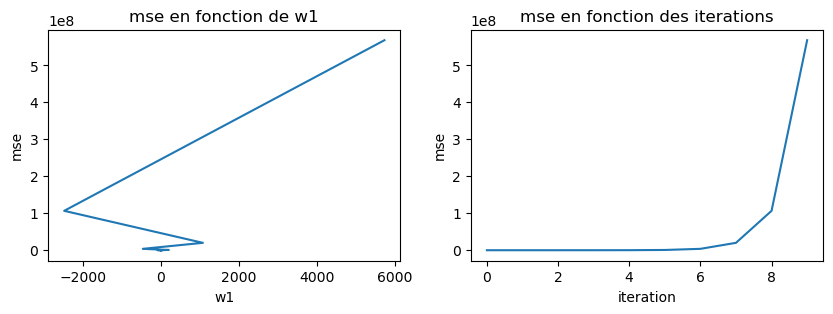

In [1113]:
def train2(X,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.1
    epochs=10
    #model parameters initialisation
    w1=0 #w1 attendu c'est 3
    bias=0 # attendu 1
    #----------------------
    n=len(X) #data size
    global w1List
    w1List=[] #list of w1: each iteration, we have a w1 value.
    global mseList
    mseList=[] # list of means squared errors: each iteration, we have a mse  

    #training
    for i in range(epochs):
          #error calculation
        yhat=bias+w1*X #prediction
        error=y-yhat # Error
        squared_error=error**2 #squared error
        mse=(1/n)*sum(squared_error) #mean squared error
        #print("(",bias, ",", w1, ") ----->",mse)
        mseList.append(mse)
        w1List.append(w1)
        dw1=(-2/n)*np.sum(X*(y-yhat)) # partial derivate of mse / w1////0.1
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / w1
        print("iteration ",i,": (bias=",round(bias,2),",w1:",round(w1,2),") --->mse=",round(mse,5)," | update: dbias=",round(dbias,2),", dw1=",round(dw1,2))
    
        w1=w1-dw1*learning_rate # orientation (-) + pas d'apprentissage (l)
        bias=bias-dbias*learning_rate
    return bias,w1
        
#execution
bias,w1=train2(X,y)
tracer_graphes(w1List,mseList,[i for i in range(10)])
    

<h4 style="color:Tomato;">Step 2: Model Prediction</h4>

In [1114]:
def predict(x1):
    return bias+w1*x1

<h4 style="color:Tomato;">Step 3: Model Evaluation</h4>
<p>vu que le dataset est tres petit, nous allons utiliser le dataset de training (X) pour évaluer le modèle (bad practice)
<br>pour le deuxième dataset (nuage de points: 100), nous allons utiliser une partie d'entrainement (70%) pour entrainer le modèle  et une partie pour de test (30%) pour évaluer le modèle</p>

In [1115]:
yhat=predict(X)
print("mean squared error ddu modèle est:",round(mse(y,yhat),3))

mean squared error ddu modèle est: 3028405633.249


<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse dans les 6 premières itérations? comment justifier ce résultat</span>
</p>
<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">qu'est ce qui se passe si on augmente le nombre d'itération(500)?. Expliquer le résultat obtenu</span>
</p>





<h3 style="color:Tomato;">Réponses</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse dans les 6 premières itérations? comment justifier ce résultat</span>
</p>
<p>
    <span style="color:Tomato;"><b> Réponse </b><br></span>
    <span  style="color:black;">dans les six premières itérations, <br> dans la première itération mse est 163.6 et dans l'itération 6 mse est: 3751552.69198. <br> on constate que mse augmente continuellement avec de très grand pas <br> en 6 itérations seulement, la valeur de mse est dèjà très grande<br> ce résultat est à cause d'une mauvaise mise à jour de w1<br>
    <br>selon les résultats imprimés et le graphe, w1 oscille autour du minimu, mais avec des pas très grandes. et à chaque itération le pas est plus grand que le pas précédent.
        <br> dans le programme, la dérivée partielle permet de trouver la bonne orientation, cependant, le learning_rate utilisé n'assure pas un bon pas de mise à jour (la valeur utilisée est grande contrairement à la version précédente de train2).
        <br>
    </span>
</p>

<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">qu'est ce qui se passe si on augmente le nombre d'itération(500)?. Expliquer le résultat obtenu</span>
</p>

<p>
    <span style="color:Tomato;"><b> réponse </b><br></span>
    <span  style="color:black;">si on augmente le nombre d'epochs à 500, les valeurs de mise à jours deviennent très grandes ce qui conduit à des valeurs exponentielles de mse</span>
</p>





<h3 style="color:Tomato;">Conclusion 1</h3>
<p>
<span  style="color:MediumSeaGreen;"><b>dans la partie précédente et pour un dataset simple, nous avons vu de près les éléments suivants:</b><br>
    </span>
    <span  style="color:MediumSeaGreen;">
   <br>1- ce que c'est un modèle de régression linéaire
   <br>2- ce que c'est un algorithme d'apprentissage
   <br>3- ce que c'est le gradient descent
   <br>4- le rôle des hyperparamètres: epochs et learning_rate
    </span>
</p>

<p>
<span  style="color:MediumSeaGreen;"><b>dans la partie suivante, nous allons étudier un nuage de points</b>
    </span>
</p>

<h3 style="color:DodgerBlue;">I.2. Linear Regression Model: One feature (nuage de points)</h3>
<p style="color:DodgerBlue;">comme dans la partie précédente, dans cette partie nous allons traiter un dataset dont l'output (y) dépend d'une seule variable (x).<br>le modèle à obtenir aura la forme suivante:h(x)=bias+w1.x</p>

<h3 style="color:Tomato;">I.1.1. Data</h3>

<h4 style="color:Tomato;">Step 1: Load / Initialize Data</h4>

In [1116]:
X=np.linspace(0,10,100) # générer 100 valeurs entre 0 et 10
y=2+3*X     # y à générer sur une droite bias=2, w1=3 (ideal model +/-)
 # valeurs aléatoires à ajouter à y
r=np.random.uniform(-7, 7, size=len(y))
y=y+r # update de y autour de la droite


<h4 style="color:Tomato;">Step 2: Plot Data</h4>

In [1117]:
#fonction qui trace :
#---1. un nuage de points
#---2. la droite sur la quelle nous nous sommes basés pour créer les y (modèle atendu)
def plot_data(X,y):
    import matplotlib.pyplot as plt
    plt.scatter(X,y,color="black")
    plt.plot(X,2+3*X,color="r") # model to find +/- (bias=2, w1=3)
    plt.show()


In [1118]:
#fonction qui trace :
#---1. un nuage de points
#---2. la droite sur la quelle nous nous sommes basés pour créer les y (modèle atendu)
#---3. le modèle résultat de l'apprentissage (bias,w1)

def plot_data_model(X,y,bias,w1):
    import matplotlib.pyplot as plt
    plt.scatter(X,y,color="black")
    plt.plot(X,2+3*X,color="r") # model to find +/- (bias=2, w1=3)
    plt.plot(X,bias+w1*X,color="b") #initial model (bias=1, w1=0)
    plt.show()


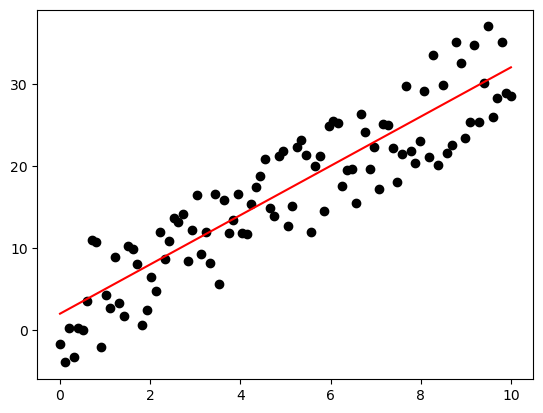

In [1119]:
plot_data(X,y)

<h4 style="color:Tomato;">Step 3: Split Data</h4>

<h4 style="color:DodgerBlue;">Pourquoi?</h4>
<p style="color:DodgerBlue;">En machine learning, toujours il faut diviser le dataset d'origine en training dataset et en testdataset afin d'évaluer la performance du modèle sur un dataset non utilisé dans la phase d'entrainement.<br></p>

In [1120]:
#data(X,y)-->data_train(X_train,y_train),data_test(X_test,y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) #
#valeur utiliser pendant la genearation des datasets de manièere aleoire

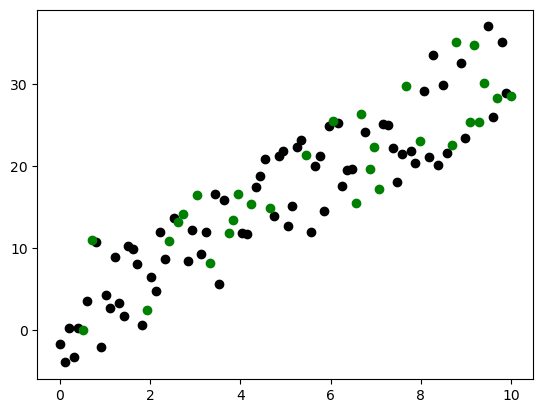

In [1121]:
plt.scatter(X_train,y_train,color="black")
plt.scatter(X_test,y_test,color="green")



<p style="color:DodgerBlue;">En noir, le dataset d'entrainement.<br>
En vert, le dataset de test.
</p>

<h3 style="color:Tomato;">I.1.2. Model (using gradient descent)</h3>

<h4 style="color:Tomato;">Step 1: Model Trainig</h4>

<p style="color:DodgerBlue;">la fonction train3 présente 
</p>

iteration  0 : (bias= 1 ,w1: 0.5 ) --->mse= 217.99  | update: dbias= -24.18 , dw1= -155.97


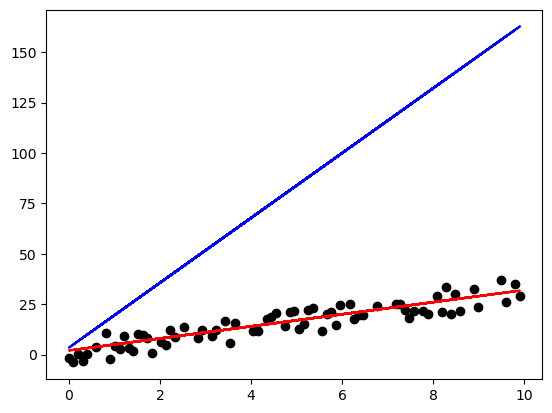

iteration  1 : (bias= 3.42 ,w1: 16.1 ) --->mse= 5419.84  | update: dbias= 126.32 , dw1= 807.16


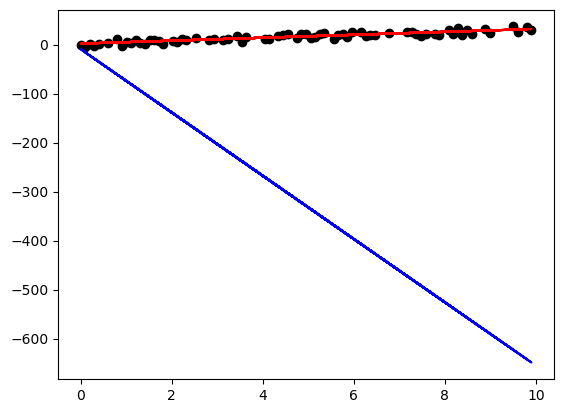

iteration  2 : (bias= -9.21 ,w1: -64.62 ) --->mse= 144789.15  | update: dbias= -652.75 , dw1= -4178.11


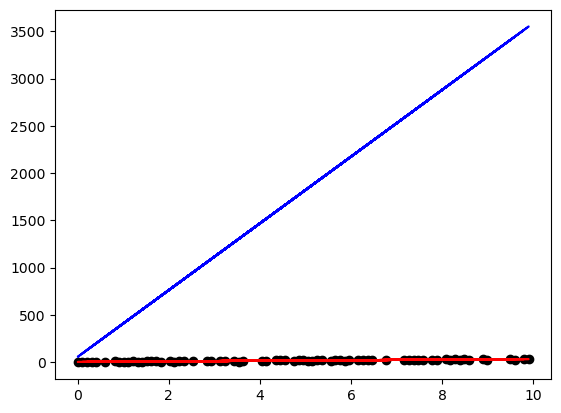

iteration  3 : (bias= 56.06 ,w1: 353.19 ) --->mse= 3878798.65  | update: dbias= 3379.78 , dw1= 21626.22


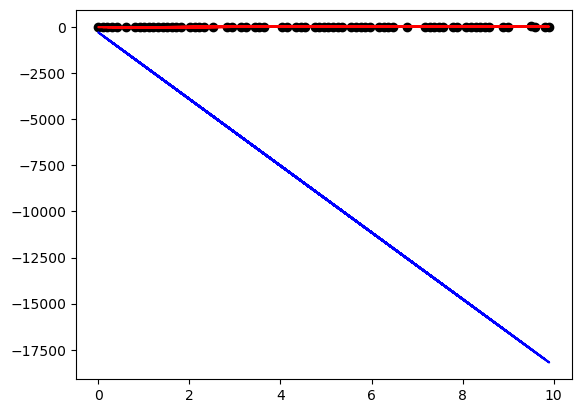

iteration  4 : (bias= -281.92 ,w1: -1809.43 ) --->mse= 103921102.78  | update: dbias= -17493.13 , dw1= -111940.02


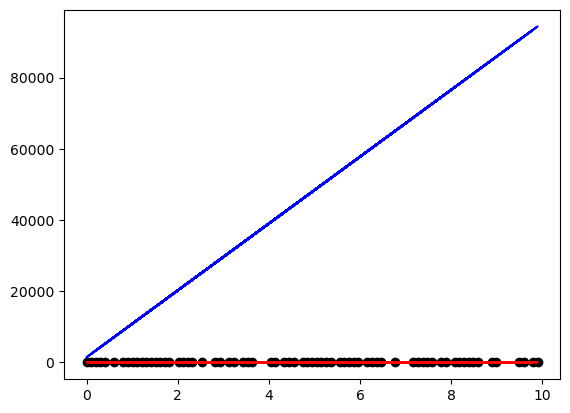

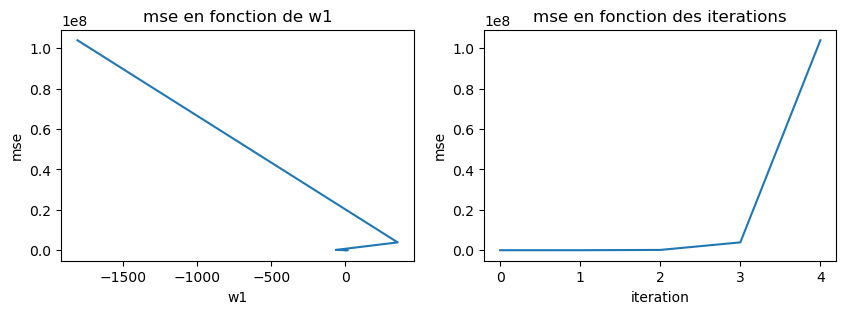

In [1122]:
def train3(X,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.1
    epochs=5
    #model parameters initialisation
    w1=0.5 #
    bias=1
    #----------------------
    n=len(X) #data size
    global mseList
    global w1List
    mseList=[]
    w1List=[]
       
 
    #training
    for i in range(epochs):
        yhat=bias+w1*X #prediction
        
        error=y-yhat # Error
        squared_error=error**2 #squared error
        mse=(1/n)*sum(squared_error) #mean squared error
        #print("(",bias, ",", w1, ") ----->",mse)
        mseList.append(mse)
        w1List.append(w1)
       
    
        dw1=(-2/n)*np.sum(X*(y-yhat)) # partial derivate of mse / w1
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / w1
        print("iteration ",i,": (bias=",round(bias,2),",w1:",round(w1,2),") --->mse=",round(mse,2)," | update: dbias=",round(dbias,2),", dw1=",round(dw1,2))

        w1=w1-dw1*learning_rate # orientation (-) + pas d'apprentissage (l)
        bias=bias-dbias*learning_rate
        plot_data_model(X,y,bias,w1)
        
    return bias,w1
        
#exécution
bias,w1=train3(X_train,y_train)
tracer_graphes(w1List,mseList,[i for i in range(5)])

<h3 style="color:Tomato;">questions</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse dans les 5 premières itérations? comment justifier ce résultat? il s'agit de quel problème? </span>
</p>
<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">qu'est ce qui se passe si on augmente le nombre d'itération(500)?. Expliquer le résultat obtenu</span>
</p>

<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">quelles sont les recommandations à faire pour corriger ce problème</span>
</p>






<h3 style="color:Tomato;">Réponses</h3>
<p>
    <span style="color:Tomato;"><b> 1) </b></span>
    <span  style="color:DodgerBlue;">comment varie mse dans les 5 premières itérations? comment justifier ce résultat? il s'agit de quel problème? </span>
</p>

<p>
    <span style="color:Tomato;"><b> réponse </b></span><br>
    <span  style="color:black;">dans les cinq premières itérations on constate que la valeur de mse continue à augmenter au lieu de diminuer.<br> vu que l'algorithme de gradient descent est implémenté correctement, alors le résultat obtenu est à cause d'un mauvais règlage: soit le nombre d'epchos ou le learning_rate<br>et vu que la valeur de mse augmente des les premières itérations alors le problème concerne le learning_rate<br> la valeur de learning_rate (0.1) cause un pas de mise à jour qui est grand  et qui conduit à chaque itération de s'éloigner davantage de l'optimum (w1=3) </span>
</p>

<p>
    <span style="color:Tomato;"><b> 2) </b></span>
    <span  style="color:DodgerBlue;">qu'est ce qui se passe si on augmente le nombre d'itération(500)?. Expliquer le résultat obtenu</span>
</p>

<p>
    <span style="color:Tomato;"><b> réponse </b></span><br>
    <span  style="color:black;">si on augmente le nombre d'itéraiton à 500, les mises à jour de mse deviennent exponentielles</span>
</p>

<p>
    <span style="color:Tomato;"><b> 3) </b></span>
    <span  style="color:DodgerBlue;">quelles sont les recommandations à faire pour corriger ce problème</span>
</p>

<p>
    <span style="color:Tomato;"><b> réponse </b></span><br>
    <span  style="color:black;">Les recommandations à faire pour corriger ce problème: fixer learning_rate à une valeur plus petite à 0.1, par exemple 0.01 et voir ce qui se passe, si ce n'est pas suffissant, essayer la valeur 0.001 et ainsi de suite. il s'agit d'un problème de règlage, on peut essayer plusieurs valeurs de learning_rate jusqu'à trouver la valeur qui donne de résultat statisfaisants. pas très petits qui peut causer au programme de ne pas converger vers le bon modèle. et pas grande qui peut causer des mises à jour exponentielles</span>
</p>






<p>
    <span  style="color:DodgerBlue;">Dans la version suivante, nous allons initialisr learning_rate à 0.01 au lieu de 0.1 </span>
</p>


iteration  0 : (bias= 1 ,w1: 0.5 ) --->mse= 217.99  | update: dbias= -24.18 , dw1= -155.97


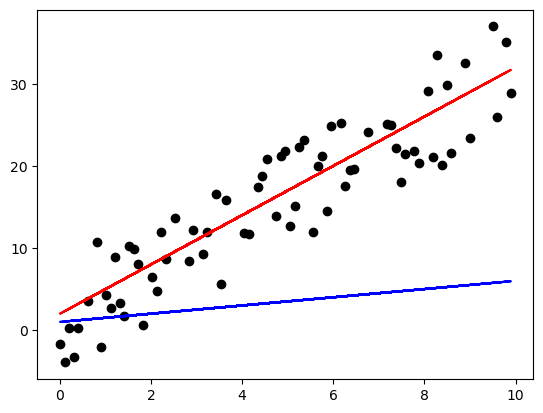

iteration  1 : (bias= 1.24 ,w1: 2.06 ) --->mse= 45.79  | update: dbias= -9.13 , dw1= -59.66
iteration  2 : (bias= 1.33 ,w1: 2.66 ) --->mse= 20.61  | update: dbias= -3.37 , dw1= -22.83
iteration  3 : (bias= 1.37 ,w1: 2.88 ) --->mse= 16.93  | update: dbias= -1.17 , dw1= -8.75
iteration  4 : (bias= 1.38 ,w1: 2.97 ) --->mse= 16.39  | update: dbias= -0.33 , dw1= -3.36
iteration  5 : (bias= 1.38 ,w1: 3.01 ) --->mse= 16.31  | update: dbias= -0.01 , dw1= -1.3
iteration  6 : (bias= 1.38 ,w1: 3.02 ) --->mse= 16.3  | update: dbias= 0.11 , dw1= -0.52
iteration  7 : (bias= 1.38 ,w1: 3.02 ) --->mse= 16.3  | update: dbias= 0.16 , dw1= -0.22
iteration  8 : (bias= 1.38 ,w1: 3.03 ) --->mse= 16.3  | update: dbias= 0.17 , dw1= -0.1
iteration  9 : (bias= 1.38 ,w1: 3.03 ) --->mse= 16.3  | update: dbias= 0.18 , dw1= -0.06
iteration  10 : (bias= 1.38 ,w1: 3.03 ) --->mse= 16.3  | update: dbias= 0.18 , dw1= -0.04
iteration  11 : (bias= 1.37 ,w1: 3.03 ) --->mse= 16.3  | update: dbias= 0.18 , dw1= -0.03
iteration

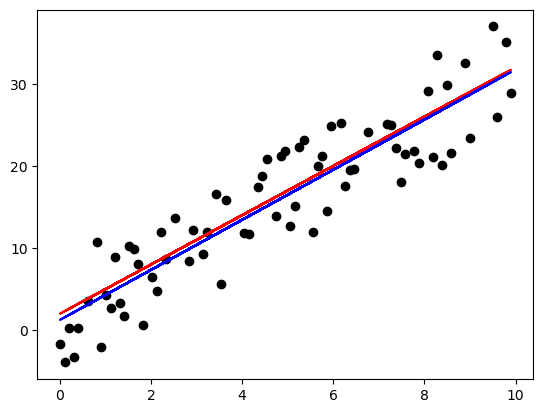

iteration  101 : (bias= 1.25 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  102 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  103 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  104 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  105 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  106 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  107 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  108 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  109 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  110 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  111 : (bias= 1.23 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.1 , 

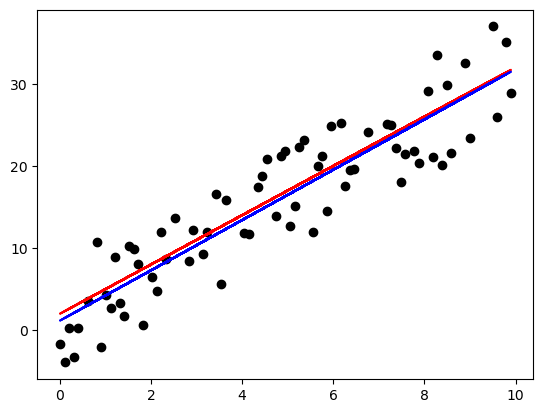

iteration  201 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  202 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  203 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  204 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  205 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  206 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  207 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  208 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  209 : (bias= 1.15 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  210 : (bias= 1.15 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  211 : (bias= 1.15 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 ,

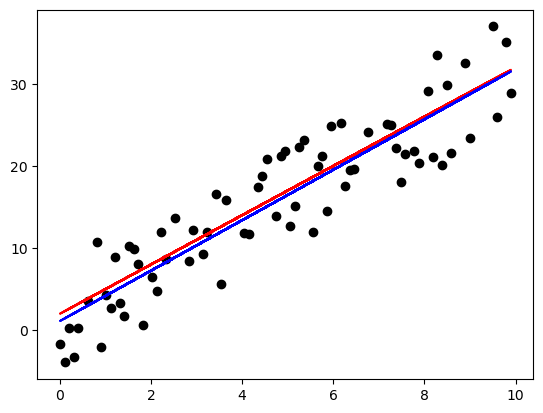

iteration  301 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  302 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  303 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  304 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  305 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  306 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  307 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  308 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  309 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  310 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  311 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 ,

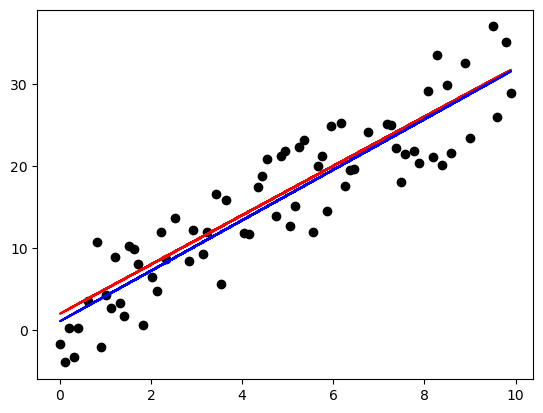

iteration  401 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  402 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  403 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  404 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  405 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  406 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  407 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  408 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  409 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  410 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  411 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0

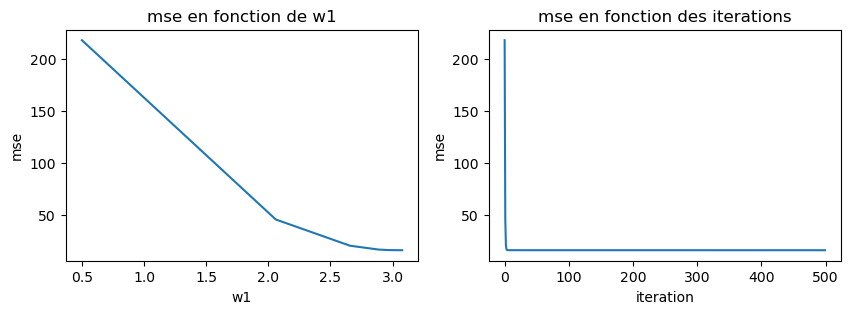

In [1123]:
def train3(X,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.01
    epochs=500
    #model parameters initialisation
    w1=0.5 #
    bias=1
    #----------------------
    n=len(X) #data size
    global mseList
    global w1List
    mseList=[]
    w1List=[]
       
 
    #training
    for i in range(epochs):
        yhat=bias+w1*X #prediction
        
        error=y-yhat # Error
        squared_error=error**2 #squared error
        mse=(1/n)*sum(squared_error) #mean squared error
        #print("(",bias, ",", w1, ") ----->",mse)
        mseList.append(mse)
        w1List.append(w1)
       
    
        dw1=(-2/n)*np.sum(X*(y-yhat)) # partial derivate of mse / w1
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / w1
        print("iteration ",i,": (bias=",round(bias,2),",w1:",round(w1,2),") --->mse=",round(mse,2)," | update: dbias=",round(dbias,2),", dw1=",round(dw1,2))
        if i%100==0:
            ploter(X,y,bias,w1)

        w1=w1-dw1*learning_rate # orientation (-) + pas d'apprentissage (l)
        bias=bias-dbias*learning_rate
        
    return bias,w1
        

#exécution
bias,w1=train3(X_train,y_train)
tracer_graphes(w1List,mseList,[i for i in range(500)])

<p>
    <span style="color:Tomato;"><b> Interprétation </b></span><br>
    <span  style="color:black;">le règlage de train3 précédent a donné de bons résulat. <br>
    nombre epochs=500<br>
    learning_rate=0.01<br>
    dernière valeur de mse: 15.6. et on constate que cette valeur est presque la même depuis l'itéaration 350.
        <br>on constate que le modèle (bias= 2.43 ,w1: 2.93) (sur la graphe en bleu)  est preque le même qui attendu (bias=2,w1=3) (en rouge sur le graphe) 
  </span>
</p>


<h4 style="color:Tomato;">Step 2: Model Prediction</h4>

In [1124]:
def predict(x1):
    return bias+w1*x1

In [1125]:
yhat=predict(X_test)

In [1126]:
yhat

array([14.11629731, 17.84552866,  9.45475813, 29.96553053, 13.18398948,
       21.26399072,  3.23937256,  9.14398885,  8.5224503 , 19.71014433,
       27.79014558, 10.38706597, 12.56245092, 22.81783712,  6.9686039 ,
       31.8301462 , 30.89783836, 11.31937381, 21.57476   , 22.19629856,
       25.61476063, 12.8732202 ,  2.617834  , 22.50706784, 15.35937443,
       29.03322269, 28.10091486, 29.65476125, 29.34399197, 24.68245279])

<h4 style="color:Tomato;">Step 3: Model Evaluation</h4>
on va utiliser X_test, y_test (best practice)


In [1127]:
def mse(y,yhat):
    return 1/(len(y))*np.sum((y-yhat)**2)

In [1128]:
mse_model=mse(y_test,yhat)

In [1129]:
print(mse_model)

17.29229240404535


<h2 style="color:DodgerBlue;">Neural Netowr: One Neurone (nuage de points)</h2>

<img src="neuron1.png"  width="500" height="400"/>

<p>les éléments d'un neurone sont:
    <br> inputs: x1
    <br>les paramètres: bias et w1
    <br>la somme pondérée: bias+w1.x1, une combinaison linéaire des inputs
    <br>une fonction d'activation: transforme la valeur de la somme pondérée
    <br>output: la prédiction qui tout simpement la valeur retournée par la fonction d'activation
    

In [1130]:
def activation(z):
    return z

iteration  0 : (bias= 1 ,w1: 0.5 ) --->mse= 217.99  | update: dbias= -24.18 , dw1= -155.97


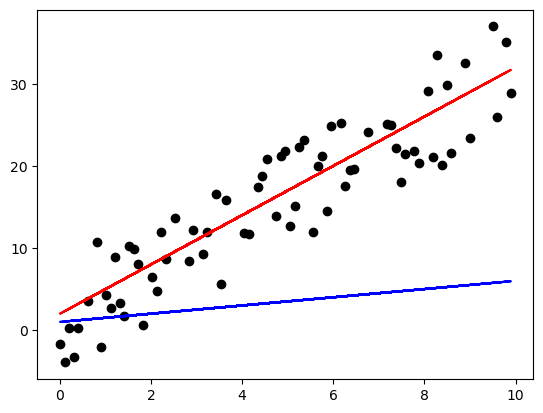

iteration  1 : (bias= 1.24 ,w1: 2.06 ) --->mse= 45.79  | update: dbias= -9.13 , dw1= -59.66
iteration  2 : (bias= 1.33 ,w1: 2.66 ) --->mse= 20.61  | update: dbias= -3.37 , dw1= -22.83
iteration  3 : (bias= 1.37 ,w1: 2.88 ) --->mse= 16.93  | update: dbias= -1.17 , dw1= -8.75
iteration  4 : (bias= 1.38 ,w1: 2.97 ) --->mse= 16.39  | update: dbias= -0.33 , dw1= -3.36
iteration  5 : (bias= 1.38 ,w1: 3.01 ) --->mse= 16.31  | update: dbias= -0.01 , dw1= -1.3
iteration  6 : (bias= 1.38 ,w1: 3.02 ) --->mse= 16.3  | update: dbias= 0.11 , dw1= -0.52
iteration  7 : (bias= 1.38 ,w1: 3.02 ) --->mse= 16.3  | update: dbias= 0.16 , dw1= -0.22
iteration  8 : (bias= 1.38 ,w1: 3.03 ) --->mse= 16.3  | update: dbias= 0.17 , dw1= -0.1
iteration  9 : (bias= 1.38 ,w1: 3.03 ) --->mse= 16.3  | update: dbias= 0.18 , dw1= -0.06
iteration  10 : (bias= 1.38 ,w1: 3.03 ) --->mse= 16.3  | update: dbias= 0.18 , dw1= -0.04
iteration  11 : (bias= 1.37 ,w1: 3.03 ) --->mse= 16.3  | update: dbias= 0.18 , dw1= -0.03
iteration

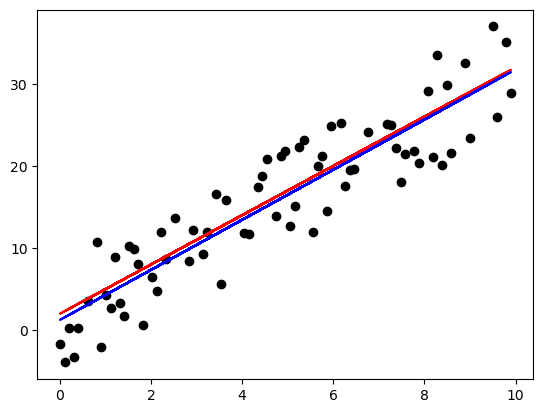

iteration  101 : (bias= 1.25 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  102 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  103 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  104 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  105 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  106 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  107 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  108 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  109 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  110 : (bias= 1.24 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.11 , dw1= -0.02
iteration  111 : (bias= 1.23 ,w1: 3.05 ) --->mse= 16.28  | update: dbias= 0.1 , 

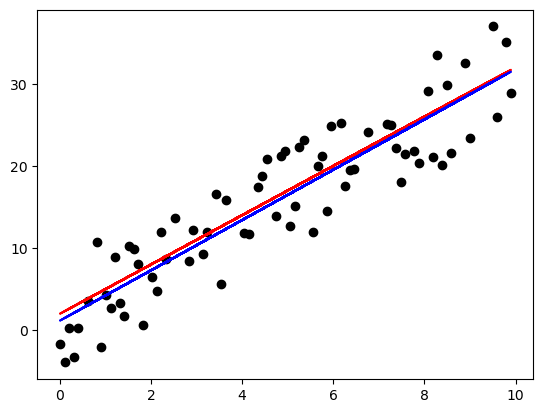

iteration  201 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  202 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  203 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  204 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  205 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  206 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  207 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  208 : (bias= 1.16 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  209 : (bias= 1.15 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  210 : (bias= 1.15 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 , dw1= -0.01
iteration  211 : (bias= 1.15 ,w1: 3.06 ) --->mse= 16.27  | update: dbias= 0.06 ,

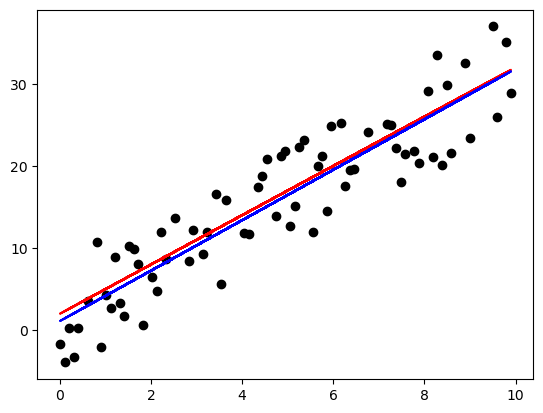

iteration  301 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  302 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  303 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  304 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  305 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  306 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  307 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  308 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  309 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  310 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 , dw1= -0.01
iteration  311 : (bias= 1.11 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.04 ,

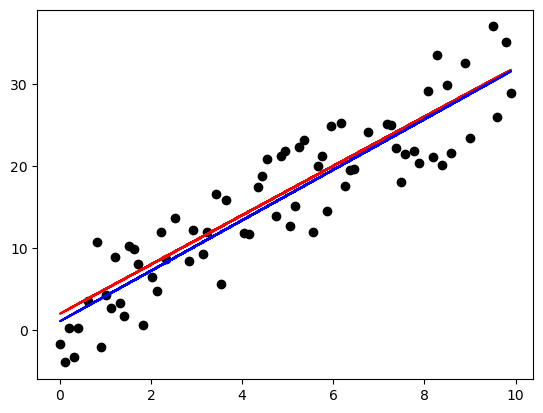

iteration  401 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  402 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  403 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  404 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  405 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  406 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  407 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  408 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  409 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  410 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0
iteration  411 : (bias= 1.08 ,w1: 3.07 ) --->mse= 16.27  | update: dbias= 0.02 , dw1= -0.0

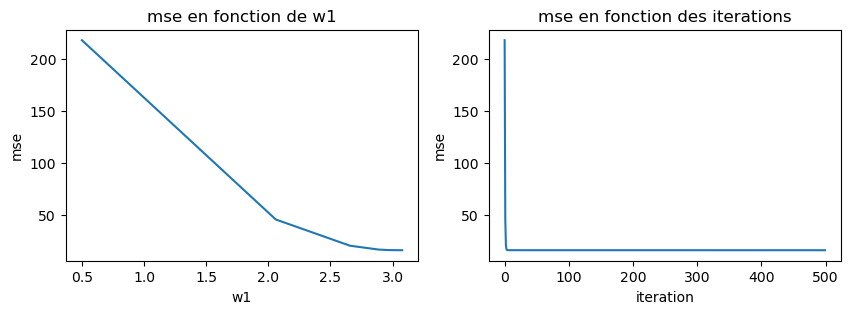

In [1131]:
def trainNN1(X,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.001
    epochs=500
    #model parameters initialisation
    w1=0.5 #
    bias=1
    #----------------------
    n=len(X) #data size
    global mseList
    global w1List
    mseList=[]
    w1List=[]
       
 
    #training
    for i in range(epochs):
        ws=bias+w1*X #prediction
        yhat=activation(ws)
        
        error=y-yhat # Error
        squared_error=error**2 #squared error
        mse=(1/n)*sum(squared_error) #mean squared error
        #print("(",bias, ",", w1, ") ----->",mse)
        mseList.append(mse)
        w1List.append(w1)
       
    
        dw1=(-2/n)*np.sum(X*(y-yhat)) # partial derivate of mse / w1
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / w1
        print("iteration ",i,": (bias=",round(bias,2),",w1:",round(w1,2),") --->mse=",round(mse,2)," | update: dbias=",round(dbias,2),", dw1=",round(dw1,2))
        if i%100==0:
            ploter(X,y,bias,w1)

        
        w1=w1-dw1*learning_rate # orientation (-) + pas d'apprentissage (l)
        bias=bias-dbias*learning_rate
                
    return bias,w1
        

#exécution
bias,w1=train3(X_train,y_train)
tracer_graphes(w1List,mseList,[i for i in range(500)])

<h2 style="color:DodgerBlue;">I.3. Linear Regression Model: Many Feature feature (Advertissing problem)</h2>

<p>Objectif est de prévoir les ventes (sales) à realiser suite à un investissement en publicité <br>
la publicité peut se faire en TV, RADIO, NewsPaper
 question: quelle est la meilleur combinaison à utiliser pour faire un bon Sales.
    exemple: si on souhaite investir 10000 Euro (TV=?, Radio? NewsPaper? afinde maximiser Sales)   
</p>

<p>trouver le modele: Sales(TV,Radio, Neawspaper)=bias+w1*TV+w2*radio+w3*newsPaper</p>

<h4 style="color:Tomato;">Step 1: Load / Initialize Data</h4>

In [1132]:
import pandas as pnd #dataframe
data_frame=pnd.read_csv("advertising.csv")
data_frame.head()
#les trois premières colonnes: features
#la dernière colonne target

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [1133]:
#convertir le dataframe en array
data=np.array(data_frame)
#extraire la partie features
X=np.array([data[i,:3] for i in range(len(data))])
#extraire la partie target
y=np.array([data[i,3] for i in range(len(data))])

<h4 style="color:Tomato;">Step 2: Data Analysis - Data Preparaton</h4>

<p style="color:black">Avant de commencer l'entrainement du modèle, il est nécessaire d'appliquer la mise à l'échelle (scaling) sur les données pour que notre algorithme d'apprentissage converge. <br>Si non, et à cause de la formule:  dw1=(-2/n)*np.sum(X*(y-yhat)) (voir train3) on risque d'avoir de tres grandes valeurs, ce qui peut permettre de dépasser l'optimum et qui entraine des valeurs exponentielles de mse. </p>

<p>pour la mise à l'échelle, on peut utiliser les techniques suivantes:</p>

<h4>-Normalisation</h4>
<p>la nomralisation se fait à l'aide de la formule suivante:<br>
<img src="normalisation.png" width="250" height="350">
</p>
<p>on peut utiliser le code suivant:</p>

<p style="color:blue">
X_norm = (X - X.min(axis=0))/ (X.max(axis=0)-X.min(axis=0))
</p>
<p>Aussi, on peut utiliser  MinMaxScaler de la librairie sklearn.preprocessing</p>


<h4>-Standardisation</h4>
<p>la standardisation se fait suite à la formule suivante:<br>
<img src="standardisation.png" width="300" height="350">
</p>
<h3>code source pour normaliser les données:</h3>
<p>on peut utiliser le code suivant:</p>

<p style="color:blue">
mu=X.mean()<br>
sigma=X.std()<br>
X_stand = (X - mu)/ sigma
</p>
<p>Aussi, on peut utiliser  StandardScaler de la librairie sklearn.preprocessing</p>



<p>différence entre normalisation et standardisation</p>
<img src="scaling_example.png" width="600" height="450">
<p>dans notre cas, nous allons utiliser StadardScaller vu que les données suivent une distribution gaussienne</p>

<img src="gaussian.png" width="250" height="250">



In [1134]:
#
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = scaler.fit_transform(X) 


<h4 style="color:Tomato;">Step 3: Split Data</h4>

In [1135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44) #
#random_state=valeur, permet de générer le même dataset à chaque fois. cette valeur assure d'avoir le même random


<h3 style="color:Tomato;">I.1.2. Model (using gradient descent)</h3>

<h4 style="color:Tomato;">Step 1: Model Trainig</h4>

In [1136]:
def train4(x1,x2,x3,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.01
    epochs=10000
    #model parameters initialisation
    w1=0.5 #
    w2=0.5
    w3=0.5
    bias=0.5
    #recherche.....
    #----------------------
    n=len(y) #data size
       
 
    #training
    for i in range(epochs):
        yhat=bias+w1*x1+w2*x2+w3*x3 #prediction
    
        dw1=(-2/n)*np.sum(x1*(y-yhat)) # partial derivate of mse / w1
        dw2=(-2/n)*np.sum(x2*(y-yhat)) # partial derivate of mse / w1
        dw3=(-2/n)*np.sum(x3*(y-yhat)) # partial derivate of mse / w1
        
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / bias
        
        w1=w1-dw1*learning_rate  #update w1
        w2=w2-dw2*learning_rate  #update w2
        w3=w3-dw3*learning_rate  #update w3
        
        bias=bias-dbias*learning_rate #update bias
        
    return bias,w1,w2,w3
        

    

In [1137]:
#data training
x1,x2,x3=X_train[:,0],X_train[:,1],X_train[:,2]
#traning
bias,w1,w2,w3=train4(x1,x2,x3,y_train)

<h4 style="color:Tomato;">Step 2: Model Prediction</h4>

In [1138]:
def predict(x1,x2,x3):
    return bias+w1*x1+w2*x2+w3*x3

In [1139]:
#data test
x1,x2,x3=X_test[:,0],X_test[:,1],X_test[:,2]
#prediction
yhat=predict(x1,x2,x3)

<h4 style="color:Tomato;">Step 3: Model Evaluation</h4>


<p>calculer MSE du modèle trouvé</p>

In [1140]:
mseModel1=mse(y_test,yhat)
print(mseModel1)

2.1004629949424114


<p style="color:Tomato; font-size:18px"><b>comparer le modèle trouvé (bias,[w1,w2,w3]) avec celui trouvé à l'aide de sklearn</b></p>

In [1141]:
# LinearRegression de sklearn
from sklearn.linear_model import LinearRegression

In [1142]:
#les phases à suivre:
#--1.créer le modèle à l'aide de LinearRegression()
#--2.entrainer le modèle à l'aide de fit()
#--2.faire les prédictions à l'aide de predict()


model=LinearRegression()
model.fit(X_train,y_train)
y_hat2=model.predict(X_test)
mseModel2=mse(y_test,y_hat2)
print(model.intercept_,model.coef_)

15.180754089219374 [ 4.73890423  1.59857798 -0.05919934]


In [1143]:
print(mseModel2)

2.1004629949423856


<h2 style="color:DodgerBlue;">I.4. One Neurone Model: Many Feature feature (Advertissing problem)</h2>

<img src="neuron.png"  width="500" height="400"/>

In [1144]:
def activation(z):
    return z

In [1145]:
#model: h(x1,x2,x3)=bias+w1.x1+w2.x2+w3.x3
#model (bias,w1,w2,w3)
#init: bias=, w1=,w2=,w3=

#update
#w1=w1-dw1
#w2=w2-dw2
#w3=w3-dw3
#bias=bias-dbias

def train5(x1,x2,x3,y):
    #hyperparameters initialisation: tuning parameters
    learning_rate=0.01
    epochs=1000
    #model parameters initialisation
    w1=0.5 #
    w2=0.5
    w3=0.5
    bias=0.5
    #----------------------
    n=len(y) #data size
       
 
    #training
    for i in range(epochs):
        ws=bias+w1*x1+w2*x2+w3*x3 #prediction
        yhat=activation(ws)
    
        dw1=(-2/n)*np.sum(x1*(y-yhat)) # partial derivate of mse / w1
        dw2=(-2/n)*np.sum(x2*(y-yhat)) # partial derivate of mse / w1
        dw3=(-2/n)*np.sum(x3*(y-yhat)) # partial derivate of mse / w1
        
        dbias=(-2/n)*np.sum((y-yhat)) #partial derivate of mse / w1
        
        w1=w1-dw1*learning_rate # orientation (-) + pas d'apprentissage (l)
        w2=w2-dw2*learning_rate # orientation (-) + pas d'apprentissage (l)
        w3=w3-dw3*learning_rate # orientation (-) + pas d'apprentissage (l)
        
        bias=bias-dbias*learning_rate
        
    return bias,w1,w2,w3
        

    

In [1146]:
#data training
x1,x2,x3=X_train[:,0],X_train[:,1],X_train[:,2]
#traning
bias,w1,w2,w3=train5(x1,x2,x3,y_train)

In [1147]:
#predict
#mse

In [1090]:
def predict(x1,x2,x3):
    return bias+w1*x1+w2*x2+w3*x3

In [1091]:
#data test
x1,x2,x3=X_test[:,0],X_test[:,1],X_test[:,2]
#prediction
yhat=predict(x1,x2,x3)

In [1092]:
mseModelOneNeurone=mse(y_test,yhat)
print(mseModelOneNeurone)

2.1004629668280246


<h3 style="color:Tomato;">Conclusion 2</h3>
<p>
<span  style="color:MediumSeaGreen;"><b>dans la partie précédente et pour un dataset simple, nous avons vu de près les éléments suivants:</b><br>
    </span>
    <span  style="color:MediumSeaGreen;">
   <br>1- ce que c'est un modèle de régression basé sur un seul neuron
   <br>2- ce que c'est un neuron
   <br>3- Adapter le gradient descent pour un neuron
    </span>
</p>

